# Showcase of toolbox.py

As the title says, this is only a showcase.  
For actual documentation, refer to toolbox.py

In [1]:
import toolbox as tb

For first testing of classifiers, we can generate multidimensional toydata easy separable in two classes.

In [2]:
toy_data = tb.createToyData(n = 550000,dim = 4,s_prob = 0.05)
toy_weights = toy_data[:,0]
toy_labels = toy_data[:,1]
x = toy_data[:,2:4]

We also can visualize the data with pyplot.scatter.

Populating the interactive namespace from numpy and matplotlib


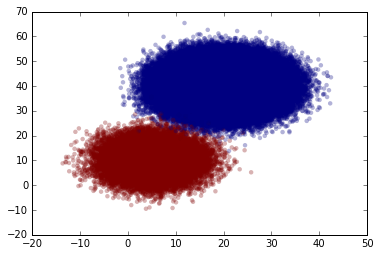

In [3]:
import matplotlib.pyplot as plt
%pylab inline
plt.scatter(x[:,0], x[:,1], edgecolor="", c=toy_labels, alpha=0.3)

For the demonstration of more tools, we need to use kaggleData.py.

In [4]:
import kaggleData as kD
csv_data,csv_header = kD.csvToArray()
sol_data,sol_header = kD.getSolutionKey(csv_data,csv_header)

We can calculate the AMS that would result from a perfect submission.

In [5]:
tb.calcMaxSetAMS(sol_data)

Maximum AMS possible with this Data:
Public Leaderboard: (67.7111228951553, 691.98860771412183, 0)
Private Leaderboard: (67.711122895128, 691.98860771368709, 0)


This function basicly uses calcSetAMS() with the solutions labels as prediction.
In general, we can calculate a AMS for any solution, using any prediction for the same amount of events.

In [6]:
tb.calcSetAMS(toy_labels,sol_data)

((0.21960018395679254, 31.27499977638896, 20262.439469879304),
 (0.24677404410377735, 35.344685123249796, 20492.171100335305))

Using the right decision threshold was key for succeeding in the challenge, we can estimate a good threshold using a bruteforce approach.

In [7]:
soft_pred = np.random.rand(550000)
tb.bestThreshold(soft_pred,sol_data,10)

(array([ 1.,  1.,  1., ...,  1.,  1.,  1.]), 1.079073517337079, 0.0)

From a prediction, we can produce an array containing all submission-relevant data.

In [8]:
test = tb.createSubmissionArray(soft_pred)

In [9]:
test

array([[  3.50000000e+05,   3.98022000e+05,   7.22675202e-01],
       [  3.50001000e+05,   4.17370000e+05,   7.57979600e-01],
       [  3.50002000e+05,   5.44256000e+05,   9.89546895e-01],
       ..., 
       [  8.99997000e+05,   7.42520000e+04,   1.35401486e-01],
       [  8.99998000e+05,   3.02050000e+05,   5.49072043e-01],
       [  8.99999000e+05,   1.39372000e+05,   2.53885580e-01]])

There is a method to sort an array with respect to a column.

In [10]:
tb.sortByColumn(test,1)

array([[  7.05041000e+05,   1.00000000e+00,   6.26743836e-06],
       [  8.75257000e+05,   2.00000000e+00,   7.48370341e-06],
       [  6.23924000e+05,   3.00000000e+00,   9.24699890e-06],
       ..., 
       [  4.54021000e+05,   5.49998000e+05,   9.99995238e-01],
       [  5.26284000e+05,   5.49999000e+05,   9.99996305e-01],
       [  5.93905000e+05,   5.50000000e+05,   9.99998373e-01]])

We also are able to directly create a submissionfile.

In [11]:
tb.createSubmissionFile(soft_pred,fname="toysubmission.csv",threshold=0.0)

We can reimport this submission data with kaggleData.csvToArray().

In [12]:
sol_csv_data,sol_csv_header = kD.csvToArray(csvF = "F:/BA_git/data/submissions/toysubmission.csv", rows=550000,columns=3)

In [13]:
sol_csv_data

array([['350000', '398022', 's'],
       ['350001', '417370', 's'],
       ['350002', '544256', 's'],
       ..., 
       ['899997', '74252', 's'],
       ['899998', '302050', 's'],
       ['899999', '139372', 's']], 
      dtype='<U16')

We can access classification runs recorded with recordRun() with getRecord().  
If no parameters are given, the standard record file "records_1.csv" is accessed.

For instruction how to use recordRun(), refer to showcase_sklearn.

In [14]:
rec_data ,rec_header = tb.getRecord()

To see, what kind of data has been recorded, we can refer to the header provided by getRecord().  
In the standard record file, we record runs of several classifiers. Often, these have different parameter options.  
To record all relevant parameters, the file provides multiple "Settings"-features.

In [15]:
rec_header

['Classifier',
 'Featurelist',
 'CV_Score',
 'PublicAMS',
 'PrivateAMS',
 'time_train',
 'time_pred',
 'Settings',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None']

With following code, we can access all best runs of each used classification method.  
First, we sort rec_data by public AMS.

In [16]:
rec_pubams=tb.sortByColumn(rec_data,3)

Then, we iterate reversed through the data.  
When we find a classifier for the first time, we expand an array called "best", an save the classifiers name to a list "gotIT".
For the remaining data, we ignore all data classified by the methods contained in gotIT.

In [17]:
gotIT = []
best = []
for row in reversed(rec_pubams):
    if row[0] not in gotIT:
        gotIT.append(row[0])
        best.append(row)
best = np.array(best)

We now have a list of recorded classification runs, beginning with our best xgboost run.

In [18]:
best

array([['xgboost', 'header_all', '2.4321543', '3.66421262680941',
        '3.71268472156738', '997.632616996765', '57.4933519363403',
        'Threshold=0.145', 'steps_=2500', 'depth_=9', 'eta_=0.01',
        'subsample_=0.9', 'eval_1=auc', 'eval_2=ams@0.14', 'None', 'None',
        'None', 'None', 'None', 'None'],
       ['gbc', 'header_all', '0.870048', '3.23356085563658',
        '3.42604955414675', '5007.69863915443', '5.73332595825195',
        'threshold=0.6666', 'trees_=100', 'depth_=12', 'eta_=0.01',
        'subsample_=0.9', 'None', 'None', 'None', 'None', 'None', 'None',
        'None', 'None'],
       ['kNN', 'header_6', '0.81892', '3.18534579809683',
        '3.17144377327013', '1.25601601600646', '123.669127941131',
        'threshold=0.7777', 'k=297', 'p=1', 'None', 'None', 'None', 'None',
        'None', 'None', 'None', 'None', 'None', 'None'],
       ['log Reg', 'header_8', '0.73912', '2.04562322781762',
        '2.07029542090901', '5.05928897857666', '0.27801704406738'